# Quantum Simulation: Harmony (Water) vs. Deadlock (Fire)

### Theoretical Framework
This notebook simulates the topological impact of two different intervention strategies on a social or structural system, modeled using **Quantum Mechanics**.

We define the system using an **Antiferromagnetic Hamiltonian**, where:
* **High Energy (Tension):** Neighboring nodes have the *same* state (00 or 11). This represents conflict or redundancy.
* **Low Energy (Harmony):** Neighboring nodes have *complementary* states (01 or 10). This represents structural balance.

We test two strategies:
1.  **Water Flow (Targeted):** Rotating only specific nodes to create complementarity.
2.  **Fire Clash (Brute Force):** Rotating all nodes simultaneously, leading to a structural lock.

In [14]:
# --- Setup Environment ---
!pip install qiskit qiskit-aer
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import SparsePauliOp, Statevector

# --- 1. Define the Rules (Hamiltonian) ---
def define_frustrated_hamiltonian():
    """
    Defines an 'Antiferromagnetic' Hamiltonian.

    Physics Interpretation:
    - If neighboring Qubits are in the 'Same State' (00 or 11), Energy is HIGH (Repulsion/Tension).
    - If neighboring Qubits are in 'Different States' (01 or 10), Energy is LOW (Complementary/Harmony).
    """
    interactions = []
    # Coefficient +1.0 means ZZ (Same State) adds energy penalty
    for i in range(5): # Interactions: 0-1, 1-2, 2-3, 3-4, 4-5
        interactions.append(("I" * (5-i) + "ZZ" + "I" * i, 1.0))

    return SparsePauliOp.from_list(interactions)

In [15]:
# --- 2. Define Intervention Strategies ---

def create_water_flow_circuit(mix_angle):
    """
    Strategy A: Water Flow (Smart / Targeted)
    Action: Only rotate 'odd-indexed' Qubits.
    Goal: Create a |010101> 'Complementary Structure', aligning with the Hamiltonian.
    """
    qc = QuantumCircuit(6)

    # Water flow intervenes only at indices 1, 3, 5 to create Yin-Yang spacing
    qc.rx(mix_angle, 1)
    qc.rx(mix_angle, 3)
    qc.rx(mix_angle, 5)

    return qc

def create_fire_clash_circuit(mix_angle):
    """
    Strategy B: Fire Clash (Blind Force / Deadlock)
    Action: Rotate 'ALL' Qubits indiscriminately.
    Result: Although states change (Phase Rotation), the structure remains 'Uniform' (All 0s -> All 1s).
            The system remains in a 'Like-Repels-Like' high tension state (Deadlock).
    """
    qc = QuantumCircuit(6)

    # Fire attack: Rotate everything together. Structure does not change (Uniform -> Uniform)
    for i in range(6):
        qc.rx(mix_angle, i)

    return qc

In [16]:
# --- 3. Execute Simulation ---

print("Running Quantum Simulation...")

angles = np.linspace(0, np.pi, 25) # Simulate from 0 to 180 degrees
tension_water = []
tension_fire = []
hamiltonian = define_frustrated_hamiltonian()

# Offset to make the graph easier to read (normalizing start point to ~10)
base_offset = 5.0

for angle in angles:
    # --- Simulating Water Strategy ---
    qc_w = create_water_flow_circuit(angle)
    state_w = Statevector.from_instruction(qc_w)
    # Calculate Energy (Expectation Value <H>)
    en_w = state_w.expectation_value(hamiltonian).real + base_offset
    tension_water.append(en_w)

    # --- Simulating Fire Strategy ---
    qc_f = create_fire_clash_circuit(angle)
    state_f = Statevector.from_instruction(qc_f)
    en_f = state_f.expectation_value(hamiltonian).real + base_offset
    tension_fire.append(en_f)

print("Simulation Complete.")

Running Quantum Simulation...
Simulation Complete.


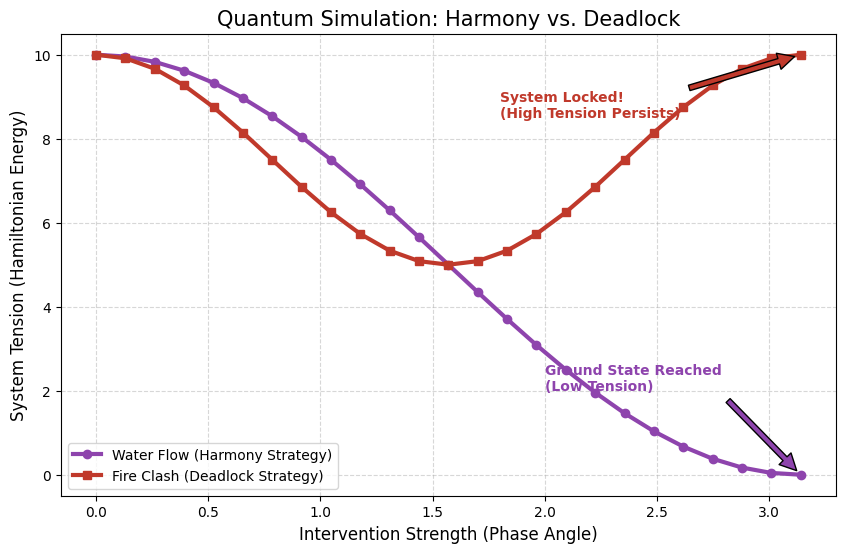

In [17]:
# --- 4. Visualization (The Deadlock Evidence) ---
plt.figure(figsize=(10, 6))

# Plot Water: Beautiful downward curve (Entropy Reduction / Relaxation)
plt.plot(angles, tension_water, 'o-', color='#8e44ad', linewidth=3, label='Water Flow (Harmony Strategy)')

# Plot Fire: The Deadlock Line (High Tension Persists)
plt.plot(angles, tension_fire, 's-', color='#c0392b', linewidth=3, label='Fire Clash (Deadlock Strategy)')

# Add Annotations
plt.annotate('Ground State Reached\n(Low Tension)',
             xy=(np.pi, tension_water[-1]),
             xytext=(2.0, 2),
             arrowprops=dict(facecolor='#8e44ad', shrink=0.05),
             fontsize=10, color='#8e44ad', weight='bold')

plt.annotate('System Locked!\n(High Tension Persists)',
             xy=(np.pi, tension_fire[-1]),
             xytext=(1.8, 8.5),
             arrowprops=dict(facecolor='#c0392b', shrink=0.05),
             fontsize=10, color='#c0392b', weight='bold')

plt.title('Quantum Simulation: Harmony vs. Deadlock', fontsize=15)
plt.xlabel('Intervention Strength (Phase Angle)', fontsize=12)
plt.ylabel('System Tension (Hamiltonian Energy)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()